In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv('heart.csv') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# Calculate correlation matrix
corr_matrix = df.corr().abs()
# Select the two features with the highest correlation with the target
top_features = corr_matrix['target'].sort_values(ascending=False).index[1:3]
print(f'Top features: {top_features}')
X = df[top_features]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Top features: Index(['ST slope', 'exercise angina'], dtype='object')


In [8]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest model: {accuracy}')

Accuracy of Random Forest model: 0.8263305322128851


c:\Users\addyg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


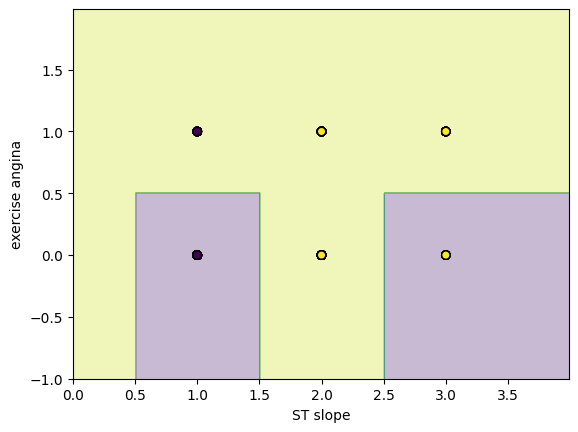

In [9]:
# Visualize decision boundaries
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

plot_decision_boundary(model, X_test, y_test)

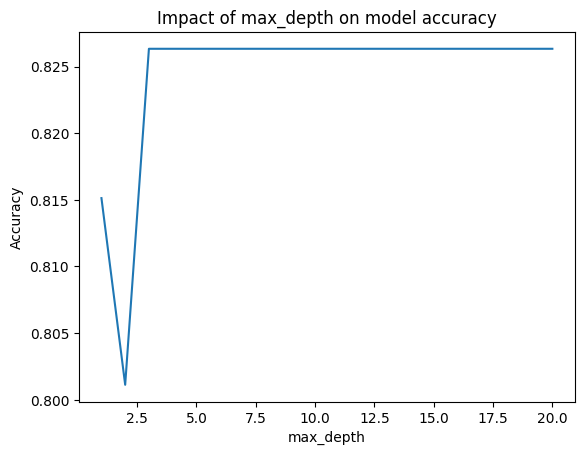

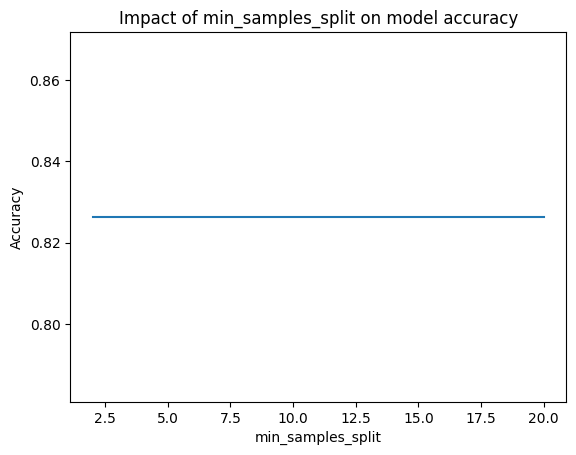

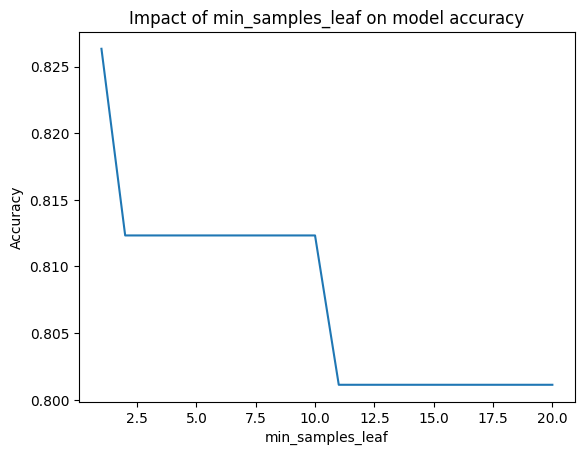

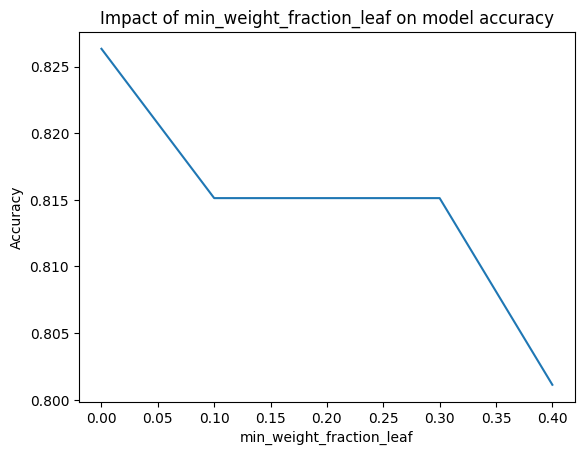

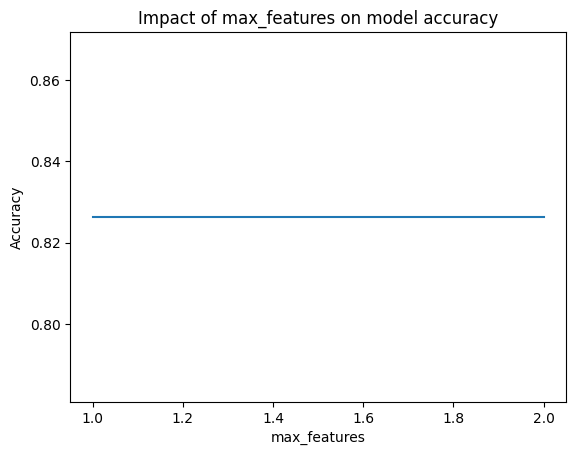

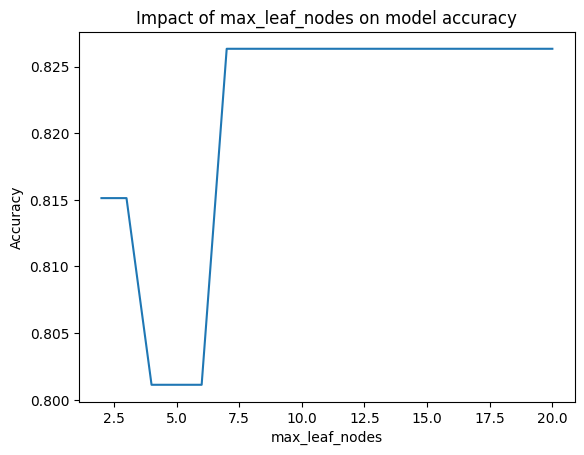

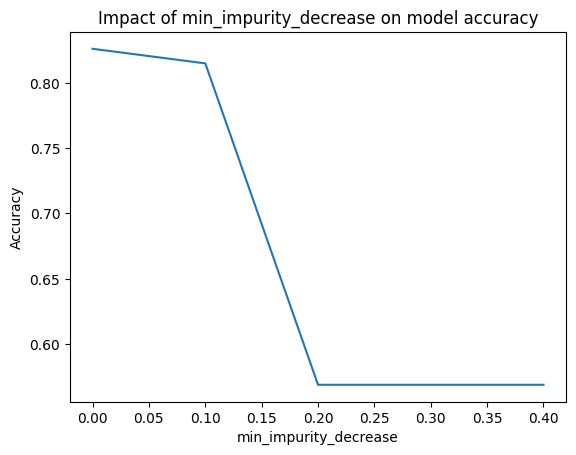

In [10]:
# Explore hyperparameters
hyperparameters = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'min_weight_fraction_leaf': [i/10 for i in range(0, 5)],
    'max_features': range(1, len(top_features)+1),
    'max_leaf_nodes': range(2, 21),
    'min_impurity_decrease': [i/10 for i in range(0, 5)]
}

for param, values in hyperparameters.items():
    accuracies = []
    for value in values:
        model = RandomForestClassifier(**{param: value}, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    plt.figure()
    plt.plot(values, accuracies)
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.title(f'Impact of {param} on model accuracy')
    plt.show()

In [11]:
# Train the final model with the best hyperparameters
best_model = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best Random Forest model: {accuracy}')

Accuracy of the best Random Forest model: 0.8263305322128851
